<a href="https://colab.research.google.com/github/lalitha12-web/Linear-Regression-Assignment/blob/main/BoomBikesSharing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

## **"BoomBikes" bike sharing company Project**

 ### **Problem Statement**

 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands






# **Steps for building a Model**

* **Step 1:** Reading, understanding and visualising data
* **Step 2:** Preparing the data for modeling(train-test split, rescaling)
* **Step 3:** Training the model
* **Step 4:** Residual analysis
* **Step 5:** Predictions and evaluation on the test set


**Step 1: Reading, understanding and visualising data**
* import necessary libraries
* Load the data
* Analysing raw data
     * Find the shape of the data
     * Datatypes of the data
     * Stastical information abou the data
     * Detailed Information about the columns by Data Dictionary
     * Checking null values
* Visualising data


In [4]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# read the data
filepath="/content/drive/MyDrive/IIITB-AIML/LinearRegression/day.csv"
bikes= pd.read_csv(filepath)


In [7]:
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
bikes.shape

(730, 16)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [11]:
# Checl column names onec
bikes.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# removing the unwanted columns
# if we observe columns and values here I feel that instant and dteday is unwanted columns as instant is identifier and already we have
# seperate columns of month and year

#Lets drop instant and dteday
bikes.drop(['instant'],axis=1,inplace=True)
bikes.drop(['dteday'],axis=1,inplace=True)

In [13]:
#lets check shape
bikes.shape


(730, 14)

In [14]:
# Now we need to convert season,month,weekday,weatherlist to categorical data
bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bikes.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

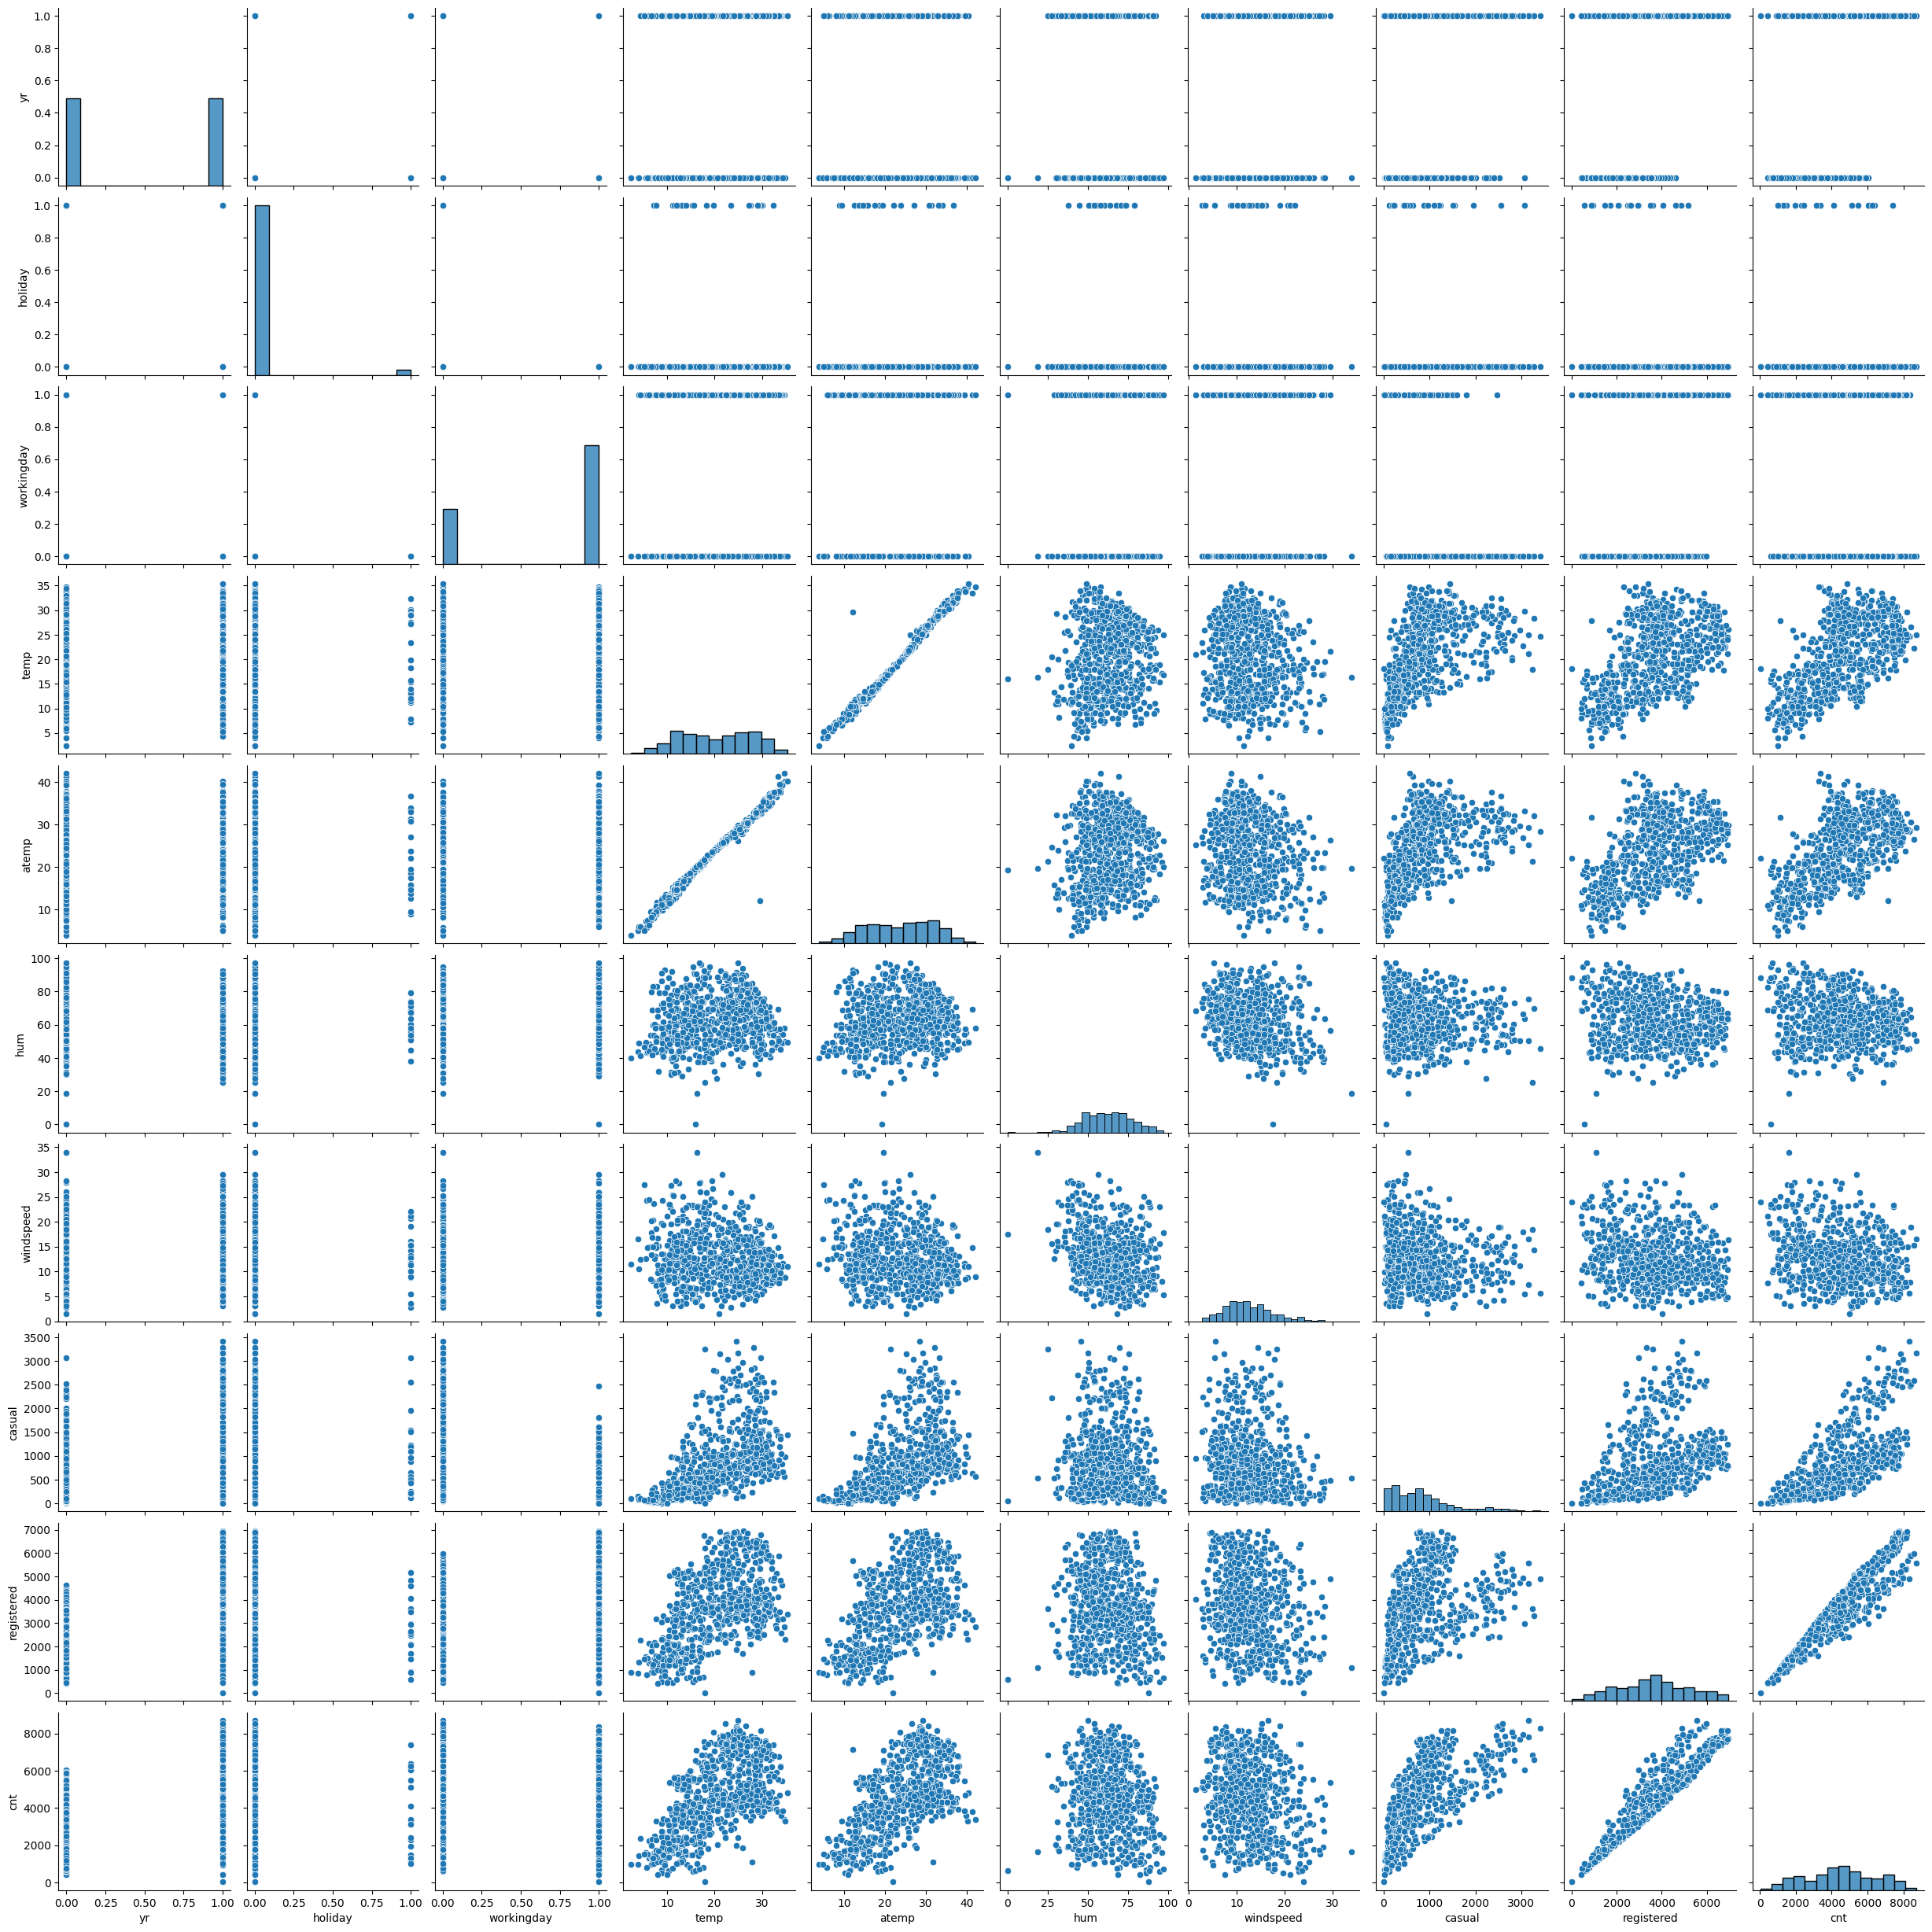

In [15]:
#visualizing data
sns.pairplot(bikes)

In [16]:
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

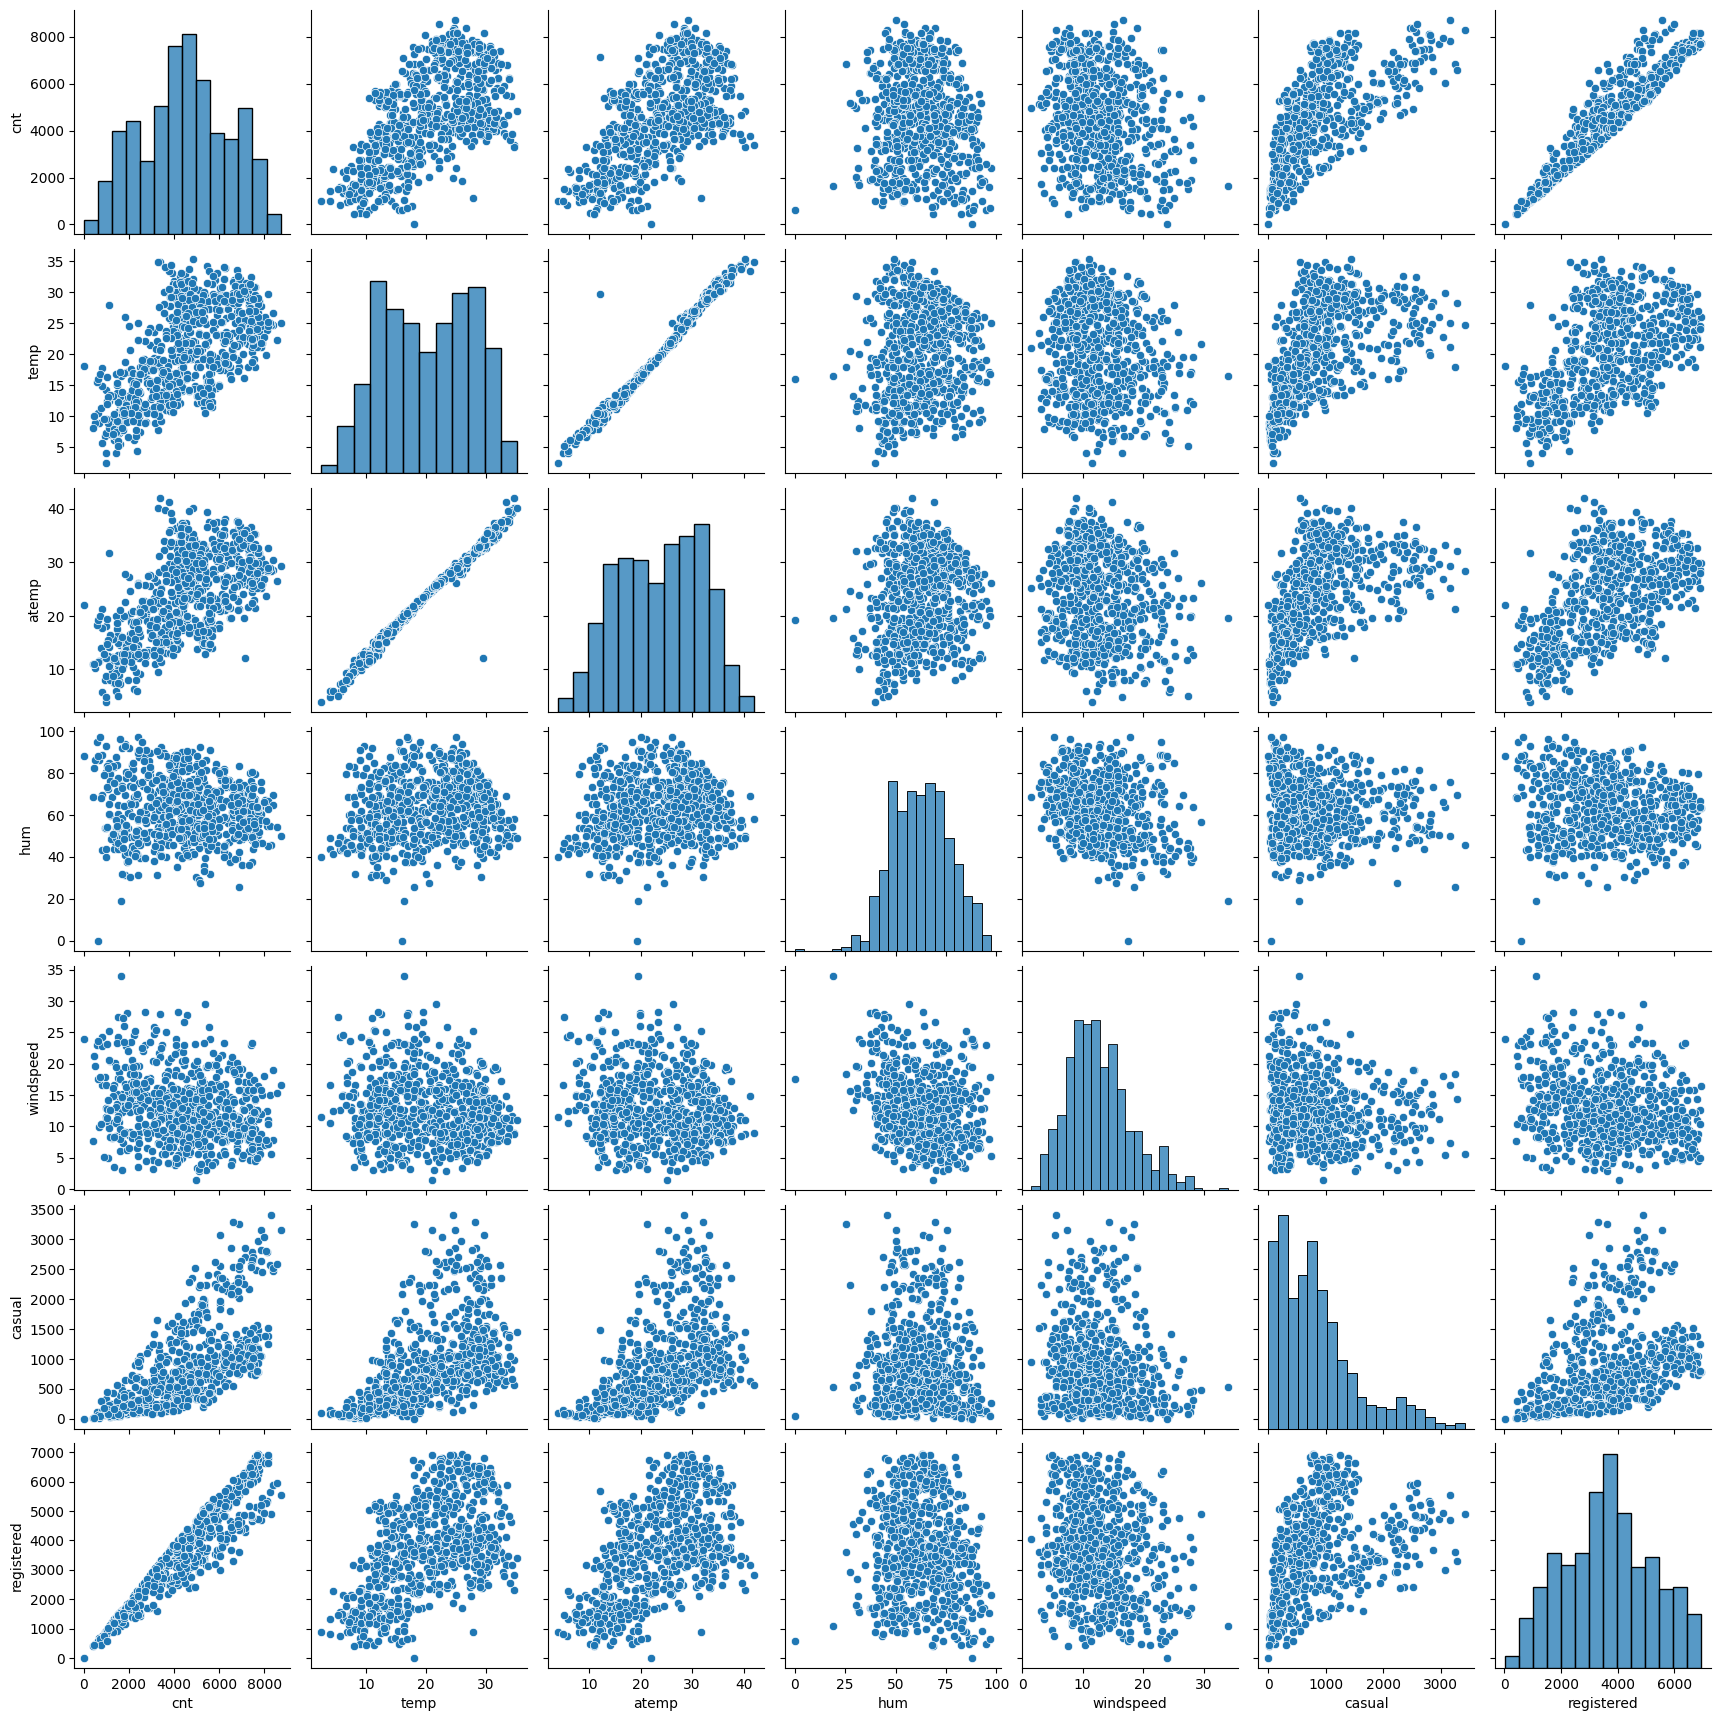

In [17]:
#Plots on numerical columns
bike_numvars=['cnt','temp','atemp','hum','windspeed','casual','registered']
sns.pairplot(data=bikes,vars=bike_numvars)

boxplot of season


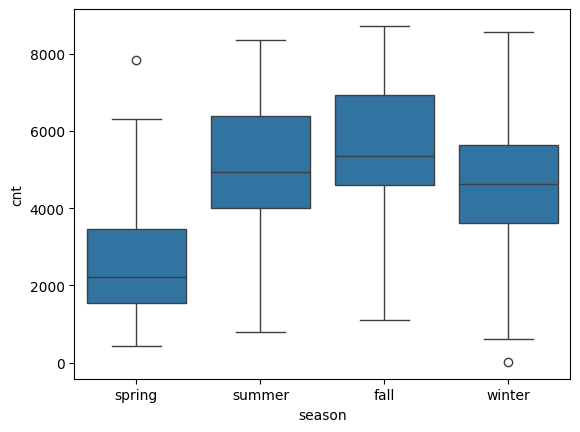

boxplot of yr


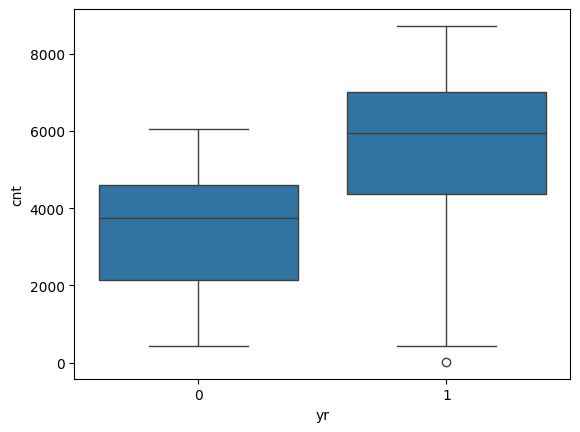

boxplot of mnth


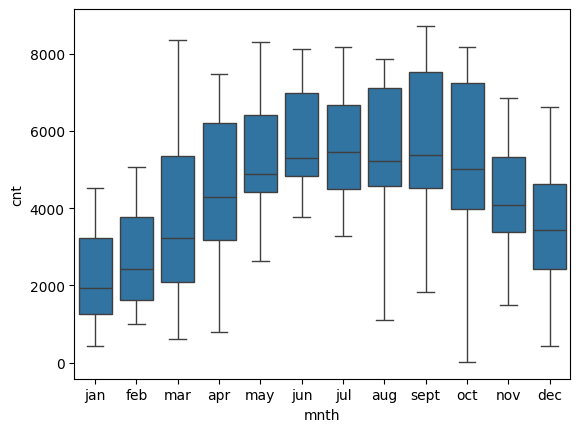

boxplot of holiday


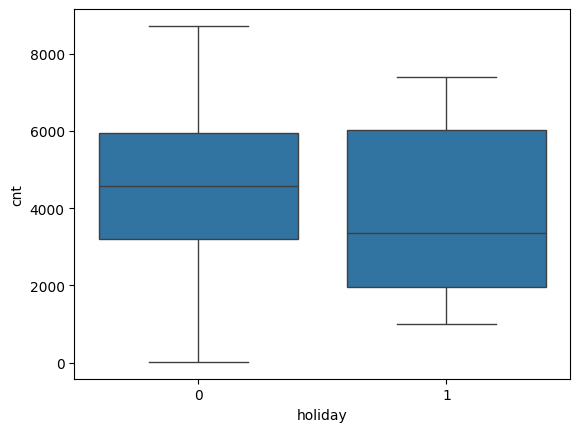

boxplot of weekday


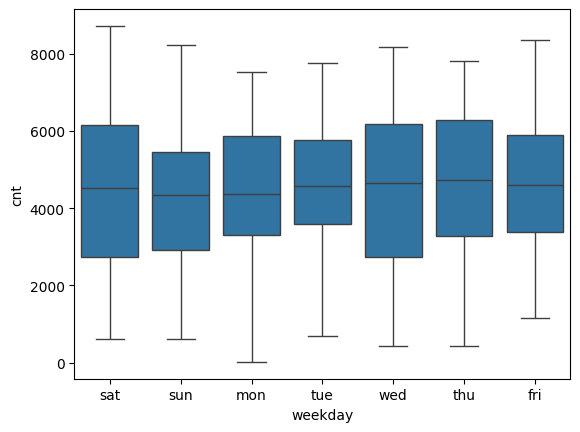

boxplot of workingday


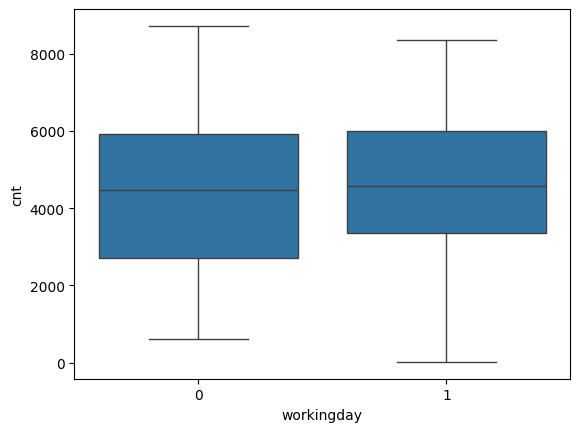

boxplot of weathersit


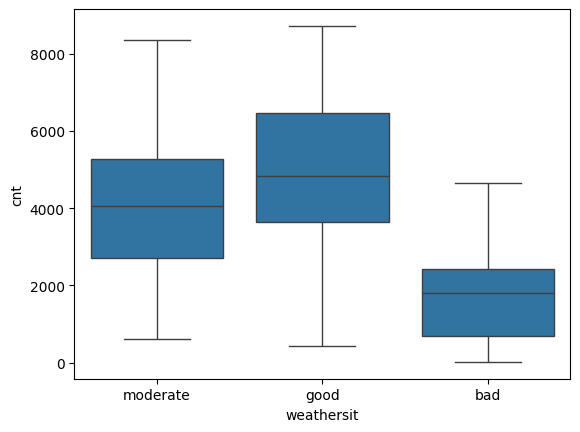

In [18]:
bike_catvars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
#Plot box plots for Categorical data
for col in bike_catvars:
    print("boxplot of", col)
    sns.boxplot(x=bikes[col],y='cnt',data=bikes)
    plt.show()

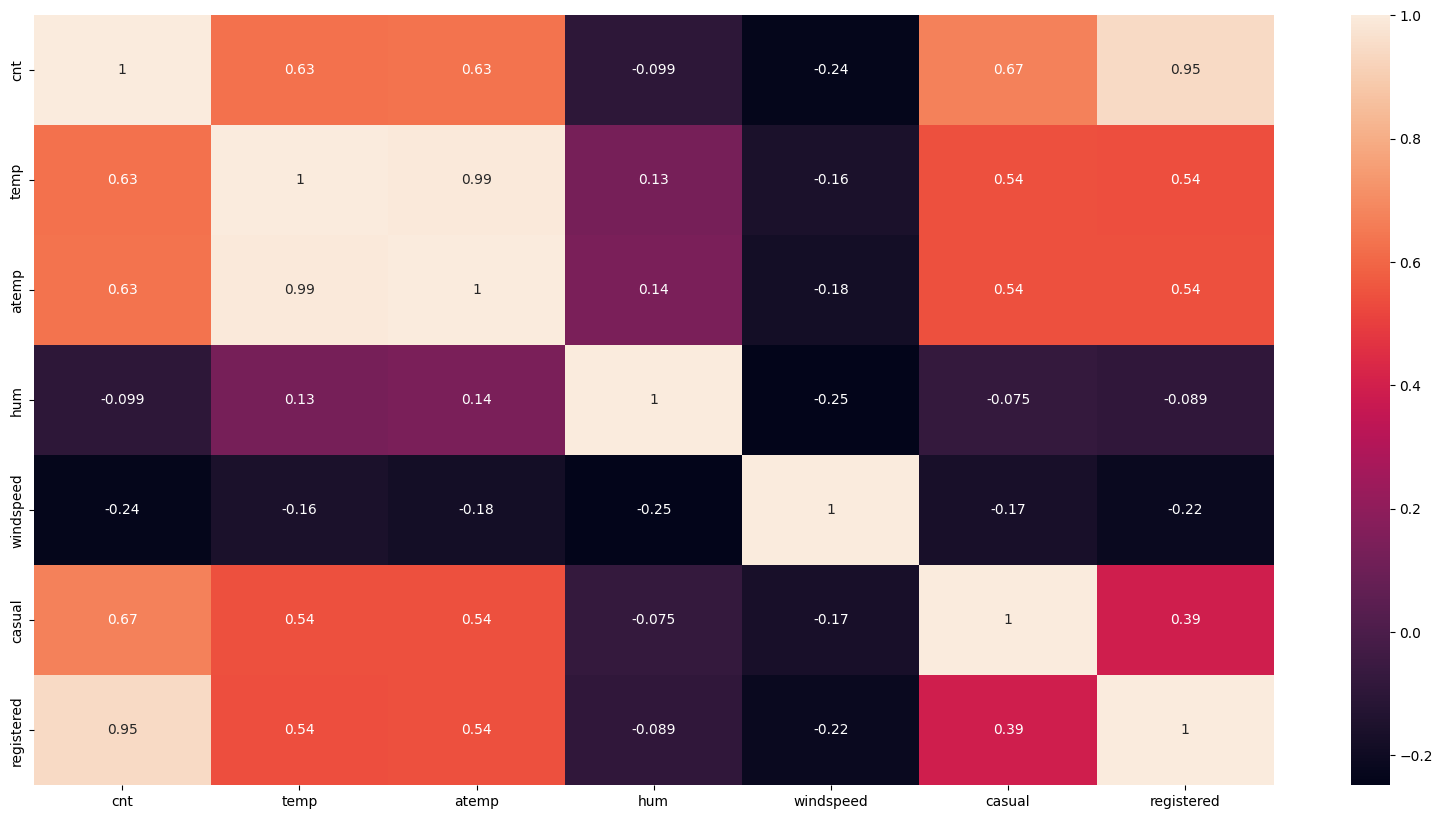

In [19]:
#Draw the heatmap for find the corelation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(bikes[bike_numvars].corr(),annot=True)
plt.show()

 # **Step 2: Preparing the data for modeling(train-test split, rescaling)**
* Encoding
    * converting binary vars to 1/0
    * Other categorical vars to dummy vars

### **Create dummy variables for "season","mnth",weathersit","weekday"**

In [20]:
bikes = pd.get_dummies(data=bikes,columns=["season","mnth","weekday"],drop_first=True)
bikes = pd.get_dummies(data=bikes,columns=["weathersit"])

In [21]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [22]:
bikes.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
0         654   985  ...      False        False         True        False   
1         670   801  ...      False        False        False         True   
2        1229  1349  ...      False         True        False        False   
3        1454  1562  ...      False        False        False        False   
4        1518  1600  ...      False        False        False        False   

   weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
0        False        False        False           False            False   
1        False        False        False           False            False   
2        False        False        False           False             True   
3        False         True        False           False             True   
4        False        False         True           False             True   

   weathersit_moderate  
0                 True  
1                 True  
2                False  
3                False  
4                False  

[5 rows x 33 columns]

In [23]:
# Convert boolean dummy variables to integers
for col in bikes.columns:
    if bikes[col].dtype == 'bool':  # Check if the column is of boolean type
        bikes[col] = bikes[col].astype(int)

In [24]:
bikes.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
0         654   985  ...          0            0            1            0   
1         670   801  ...          0            0            0            1   
2        1229  1349  ...          0            1            0            0   
3        1454  1562  ...          0            0            0            0   
4        1518  1600  ...          0            0            0            0   

   weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
0            0            0            0               0                0   
1            0            0            0               0                0   
2            0            0            0               0                1   
3            0            1            0               0                1   
4            0            0            1               0                1   

   weathersit_moderate  
0                    1  
1                    1  
2                    0  
3                    0  
4                    0  

[5 rows x 33 columns]

##Split data into trainset and test set

In [25]:
#Check the shape once
bikes.shape

(730, 33)

In [26]:
#lets take y value, the target value is cnt
#y=bikes.pop('cnt')

# lets assign x
X=bikes

#lets split train and test sets
bikes_train,bikes_test= train_test_split(bikes, train_size=0.7,random_state=100)
bikes_train.shape
bikes_test.shape



(220, 33)

In [27]:
bikes_test.shape

(220, 33)

In [28]:
bikes_train.shape

(510, 33)

Rescalling

In [29]:
#Intialize scaler
scaler=MinMaxScaler()




In [30]:
#before scaling check the data
bikes_train.head()

yr  holiday  workingday       temp    atemp      hum  windspeed  casual  \
576   1        0           1  29.246653  33.1448  70.4167  11.083475     968   
426   1        0           0  16.980847  20.6746  62.1250  10.792293     956   
728   1        0           0  10.489153  11.5850  48.3333  23.500518     364   
482   1        0           0  15.443347  18.8752  48.9583   8.708325    1120   
111   0        0           1  13.803347  16.0977  72.9583  14.707907     177   

     registered   cnt  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
576        6248  7216  ...          0            0            0            0   
426        3110  4066  ...          0            0            1            0   
728        1432  1796  ...          0            0            0            1   
482        3100  4220  ...          0            0            1            0   
111        1506  1683  ...          0            0            0            0   

     weekday_thu  weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
576            0            1            0               0                1   
426            0            0            0               0                0   
728            0            0            0               0                1   
482            0            0            0               0                0   
111            0            0            0               0                0   

     weathersit_moderate  
576                    0  
426                    1  
728                    0  
482                    1  
111                    1  

[5 rows x 33 columns]

In [33]:
#Numerical variables
numvars=['temp','atemp','hum','windspeed','casual','registered','cnt']

#Fit on data
bikes_train[numvars]=scaler.fit_transform(bikes_train[numvars])

#Check the data after testing
bikes_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

       casual  registered       cnt  ...  mnth_sept  weekday_mon  weekday_sat  \
576  0.294422    0.899220  0.827658  ...          0            0            0   
426  0.290765    0.446145  0.465255  ...          0            0            1   
728  0.110332    0.203869  0.204096  ...          0            0            0   
482  0.340750    0.444701  0.482973  ...          0            0            1   
111  0.053337    0.214554  0.191095  ...          0            0            0   

     weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
576            0            0            1            0               0   
426            0            0            0            0               0   
728            1            0            0            0               0   
482            0            0            0            0               0   
111            0            0            0            0               0   

     weathersit_good  weathersit_moderate  
576                1                    0  
426                0                    1  
728                1                    0  
482                0                    1  
111                0                    1  

[5 rows x 33 columns]

#Step 3: Train the Modle

In [34]:
# Lets check the statistics
bikes_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed      casual  registered         cnt  ...   mnth_sept  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.254689    0.523781    0.513499  ...    0.080392   
std      0.169803    0.206015    0.227896    0.224421  ...    0.272166   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.094179    0.353487    0.356420  ...    0.000000   
50%      0.296763    0.212740    0.525123    0.518638  ...    0.000000   
75%      0.414447    0.327415    0.696073    0.684710  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

       weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.150980     0.154902     0.143137     0.133333     0.131373   
std       0.358381     0.362166     0.350557     0.340268     0.338139   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_wed  weathersit_bad  weathersit_good  weathersit_moderate  
count   510.000000      510.000000       510.000000           510.000000  
mean      0.158824        0.029412         0.625490             0.345098  
std       0.365870        0.169124         0.484471             0.475867  
min       0.000000        0.000000         0.000000             0.000000  
25%       0.000000        0.000000         0.000000             0.000000  
50%       0.000000        0.000000         1.000000             0.000000  
75%       0.000000        0.000000         1.000000             1.000000  
max       1.000000        1.000000         1.000000             1.000000  

[8 rows x 33 columns]

<Axes: >

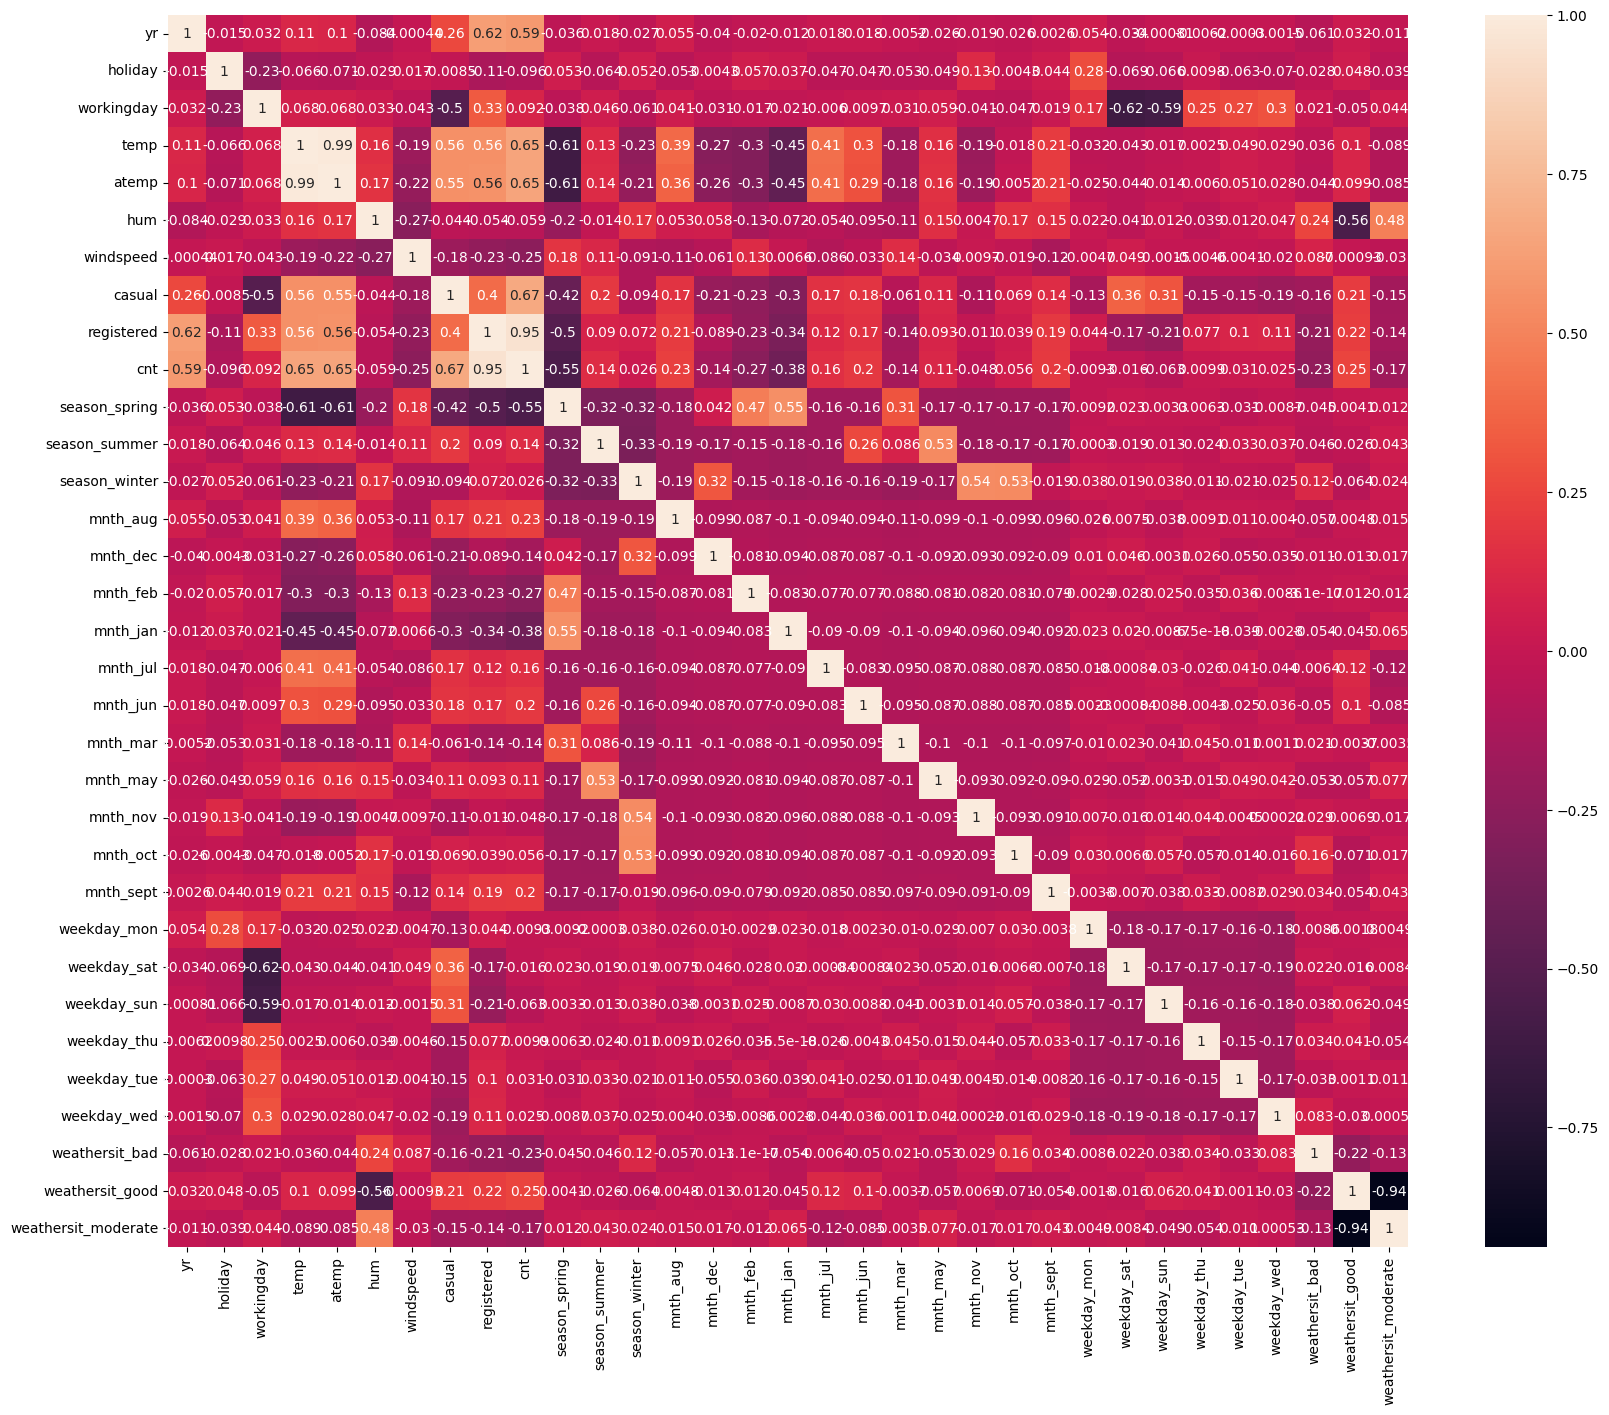

In [36]:
#Lets check the heatmap to find the correaltion between the numerical variables
plt.figure(figsize=(20,16))
sns.heatmap(bikes_train.corr(),annot=True)

In [37]:
# Lets take X_train, y_train
y_train=bikes_train.pop('cnt')
X_train=bikes_train

In [38]:
#lets find first 5 rows of X_train
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

       casual  registered  season_spring  ...  mnth_sept  weekday_mon  \
576  0.294422    0.899220              0  ...          0            0   
426  0.290765    0.446145              1  ...          0            0   
728  0.110332    0.203869              1  ...          0            0   
482  0.340750    0.444701              0  ...          0            0   
111  0.053337    0.214554              0  ...          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
576            0            0            0            1            0   
426            1            0            0            0            0   
728            0            1            0            0            0   
482            1            0            0            0            0   
111            0            0            0            0            0   

     weathersit_bad  weathersit_good  weathersit_moderate  
576               0                1                    0  
426               0                0                    1  
728               0                1                    0  
482               0                0                    1  
111               0                0                    1  

[5 rows x 32 columns]

**Adding all variables to the Model**

In [39]:
  # Check all the cloumns
  bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
# build model with all variables
X_train_sm = sm.add_constant(X_train)

#create Model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#lr_params
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.995e+30
Date:                Mon, 27 May 2024   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:                 17443.
No. Observations:                 510   AIC:                        -3.482e+04
Df Residuals:                     479   BIC:                        -3.469e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.816e-17   1.19e-16      0.321      0.748   -1.95e-16    2.72e-16
yr                  -4.571e-16   5.59e-17     -8.177      0.000   -5.67e-16   -3.47e-16
holiday              5.529e-18   9.24e-17      0.060      0.952   -1.76e-16    1.87e-16
workingday            8.76e-17   5.65e-17      1.550      0.122   -2.35e-17    1.99e-16
temp                -9.714e-17   5.67e-16     -0.171      0.864   -1.21e-15    1.02e-15
atemp                9.021e-17   5.47e-16      0.165      0.869   -9.84e-16    1.16e-15
hum                 -1.602e-16   1.55e-16     -1.036      0.301   -4.64e-16    1.44e-16
windspeed            4.372e-16   1.09e-16      3.993      0.000    2.22e-16    6.52e-16
casual                  0.3775   1.59e-16   2.37e+15      0.000       0.377       0.377
registered              0.7968   1.89e-16   4.21e+15      0.000       0.797       0.797
season_spring        4.718e-16   1.19e-16      3.972      0.000    2.38e-16    7.05e-16
season_summer        4.614e-16   1.04e-16      4.438      0.000    2.57e-16    6.66e-16
season_winter        3.098e-16   1.13e-16      2.737      0.006    8.74e-17    5.32e-16
mnth_aug             2.845e-16   1.34e-16      2.125      0.034    2.15e-17    5.48e-16
mnth_dec            -4.163e-17   1.33e-16     -0.313      0.755   -3.03e-16     2.2e-16
mnth_feb            -7.806e-17    1.3e-16     -0.599      0.549   -3.34e-16    1.78e-16
mnth_jan             3.227e-16   1.33e-16      2.425      0.016    6.12e-17    5.84e-16
mnth_jul            -2.776e-17   1.39e-16     -0.200      0.841      -3e-16    2.44e-16
mnth_jun            -1.596e-16   9.91e-17     -1.611      0.108   -3.54e-16    3.51e-17
mnth_mar             6.765e-17    9.7e-17      0.697      0.486   -1.23e-16    2.58e-16
mnth_may            -9.584e-17   8.39e-17     -1.142      0.254   -2.61e-16    6.91e-17
mnth_nov            -5.898e-17   1.44e-16     -0.410      0.682   -3.42e-16    2.24e-16
mnth_oct            -6.592e-17   1.42e-16     -0.464      0.643   -3.45e-16    2.13e-16
mnth_sept            3.469e-17   1.27e-16      0.272      0.785   -2.15e-16    2.85e-16
weekday_mon         -3.123e-17   6.11e-17     -0.511      0.610   -1.51e-16    8.89e-17
weekday_sat          5.464e-17   5.46e-17      1.000      0.318   -5.27e-17    1.62e-16
weekday_sun          1.256e-16   5.51e-17      2.278      0.023    1.73e-17    2.34e-16
weekday_thu          6.072e-18   6.21e-17      0.098      0.922   -1.16e-16    1.28e-16
weekday_tue         -1.631e-16   6.21e-17     -2.627      0.009   -2.85e-16   -4.11e-17
weekday_wed           2.27e-16      6e-17      3.786      0.000    1.09e-16    3.45e-16
weathersit_bad      -1.767e-16   8.85e-17     -1.997      0.046   -3.51e-16   -2.87e-18
weathersit_good     -3.261e-16   5.27e-17     -6.191      0.000    -4.3e-16   -2.23e-16
wea

In [46]:
#Lets find the VIF value
#Create the dataframe that will contain the names of all the features variables and their respect VIF's
# vif=pd.DataFrame()
# vif['features']=X_train.columns
# vif['VIF']=[variance_inflation_factor((X_train.values,i) for i in range(X_train.shape[1]))]
# vif['VIF']=round(vif['VIF'],2)
# vif=vif.sort_values(by="VIF",ascending=False)
# vif

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
31  weathersit_moderate    inf
24          weekday_sat    inf
2            workingday    inf
30      weathersit_good    inf
29       weathersit_bad    inf
25          weekday_sun    inf
1               holiday    inf
3                  temp  68.41
4                 atemp  56.19
9         season_spring  10.84
11        season_winter   9.95
10        season_summer   8.40
8            registered   7.74
20             mnth_nov   6.81
12             mnth_aug   6.50
21             mnth_oct   6.50
15             mnth_jan   5.95
13             mnth_dec   5.71
16             mnth_jul   5.66
22            mnth_sept   5.00
7                casual   4.48
14             mnth_feb   4.41
18             mnth_mar   3.47
0                    yr   3.26
17             mnth_jun   2.89
19             mnth_may   2.27
5                   hum   2.12
28          weekday_wed   2.01
23          weekday_mon   2.00
26          weekday_thu   1.86
27          weekday_tue   1.84
6             windspeed   1.44